# 데이터 전처리 

## 데이터, 라이브러리 IMPORT 

In [4]:
# 라이브러리 import 

import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.metrics import classification_report, accuracy_score, f1_score, precision_score, recall_score,roc_auc_score, mean_squared_error

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder



from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score


import warnings 
warnings.filterwarnings("ignore")


In [40]:
# 데이터 로드
df = pd.read_csv("./loan_data.csv")
df.head(3)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0


### 결측치 및 이상치 확인 

In [7]:
# 결측치 확인 
# 결측치는 없음 

print(df.isna().sum().sum())
print(df.isnull().sum().sum())

0
0


In [16]:
# 중복 값 여부 화인 
# 중복되는 값 없음
print(df.duplicated().sum())

0


In [101]:
print(df.info())
print(df.select_dtypes(include="object"))
# purpose 컬럼만 object형태 >> 변환 필요 
# credit.policy,not.fully.paid >> 범주형 데이터 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   days.with.cr.line  9578 non-null   float64
 7   revol.bal          9578 non-null   int64  
 8   revol.util         9578 non-null   float64
 9   inq.last.6mths     9578 non-null   int64  
 10  delinq.2yrs        9578 non-null   int64  
 11  pub.rec            9578 non-null   int64  
 12  not.fully.paid     9578 non-null   int64  
 13  grade              9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB
None
                 purpose
0     debt_consolidation
1       

In [38]:
# purpose 컬럼 데이터 확인 
df["purpose"].value_counts()

debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: purpose, dtype: int64

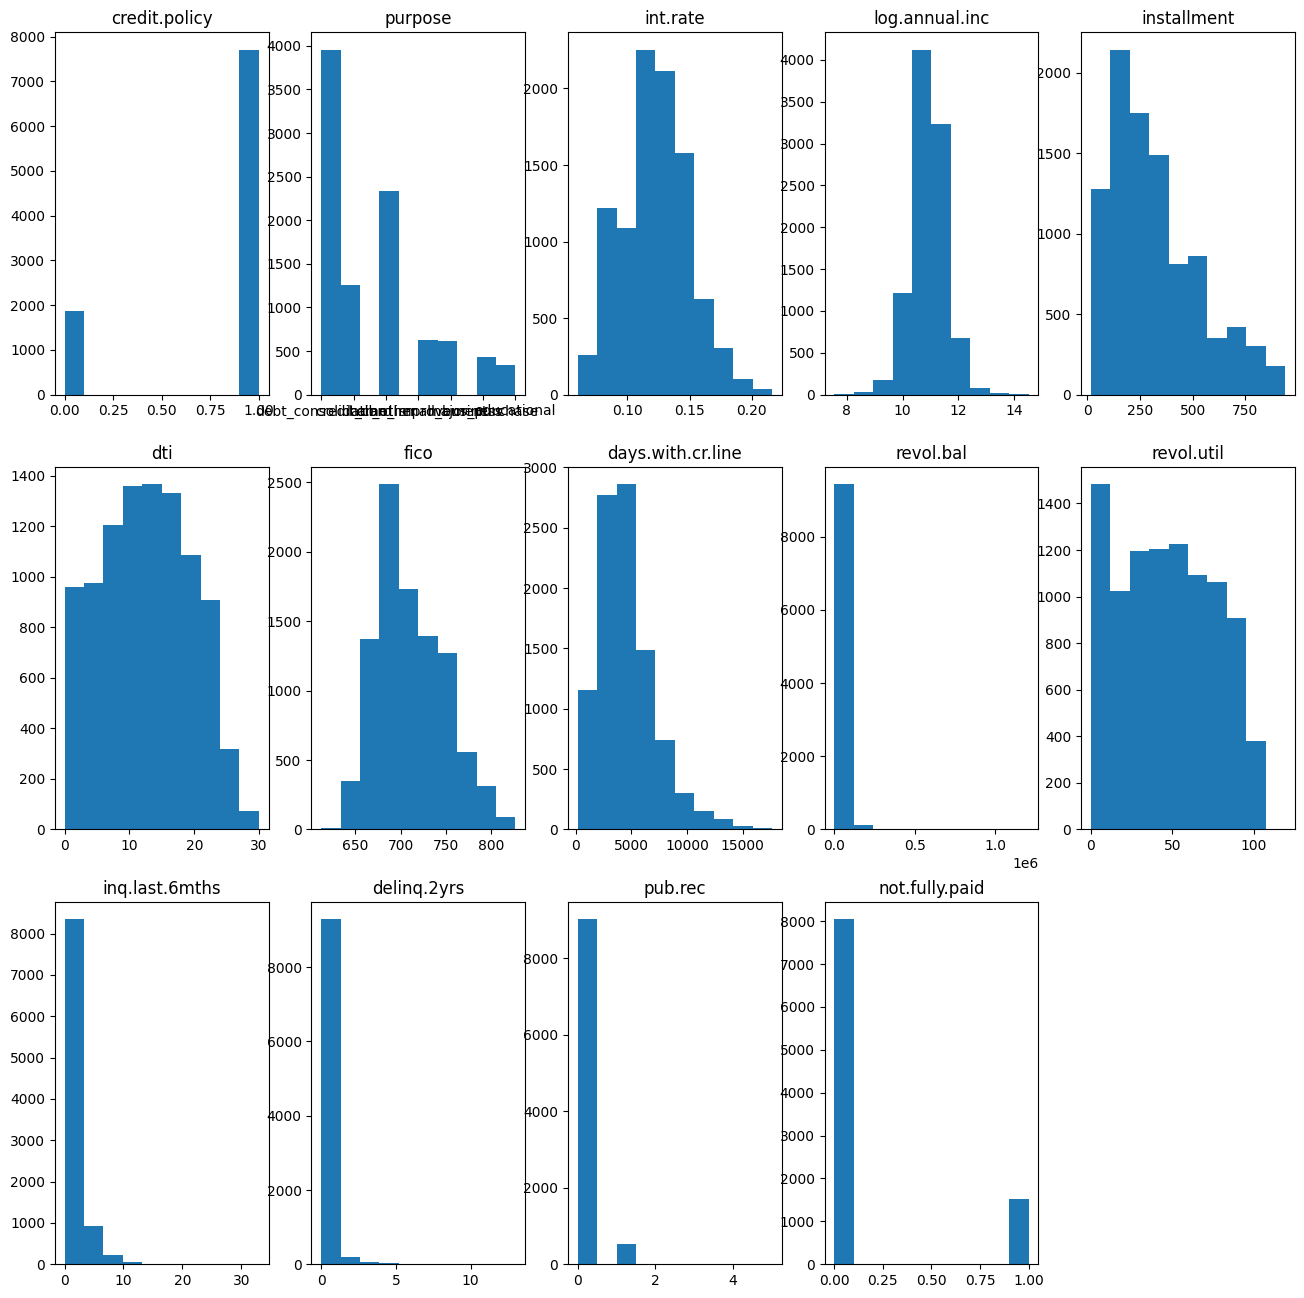

In [37]:
# 히스토그램을 통해서 데이터의 분포 확인 

plt.figure(figsize=(16,16))

plt.subplot(3,5,1)
plt.hist(df["credit.policy"])
plt.title("credit.policy")

plt.subplot(3,5,2)
plt.hist(df["purpose"])
plt.title("purpose")

plt.subplot(3,5,3)
plt.hist(df["int.rate"])
plt.title("int.rate")

plt.subplot(3,5,5)
plt.hist(df["installment"])
plt.title("installment")

plt.subplot(3,5,4)
plt.hist(df["log.annual.inc"])
plt.title("log.annual.inc")

plt.subplot(3,5,6)
plt.hist(df["dti"])
plt.title("dti")

plt.subplot(3,5,7)
plt.hist(df["fico"])
plt.title("fico")

plt.subplot(3,5,8)
plt.hist(df["days.with.cr.line"])
plt.title("days.with.cr.line")

plt.subplot(3,5,9)
plt.hist(df["revol.bal"])
plt.title("revol.bal")

plt.subplot(3,5,10)
plt.hist(df["revol.util"])
plt.title("revol.util")

plt.subplot(3,5,11)
plt.hist(df["inq.last.6mths"])
plt.title("inq.last.6mths")

plt.subplot(3,5,12)
plt.hist(df["delinq.2yrs"])
plt.title("delinq.2yrs")

plt.subplot(3,5,13)
plt.hist(df["pub.rec"])
plt.title("pub.rec")

plt.subplot(3,5,14)
plt.hist(df["not.fully.paid"])
plt.title("not.fully.paid")


plt.show()

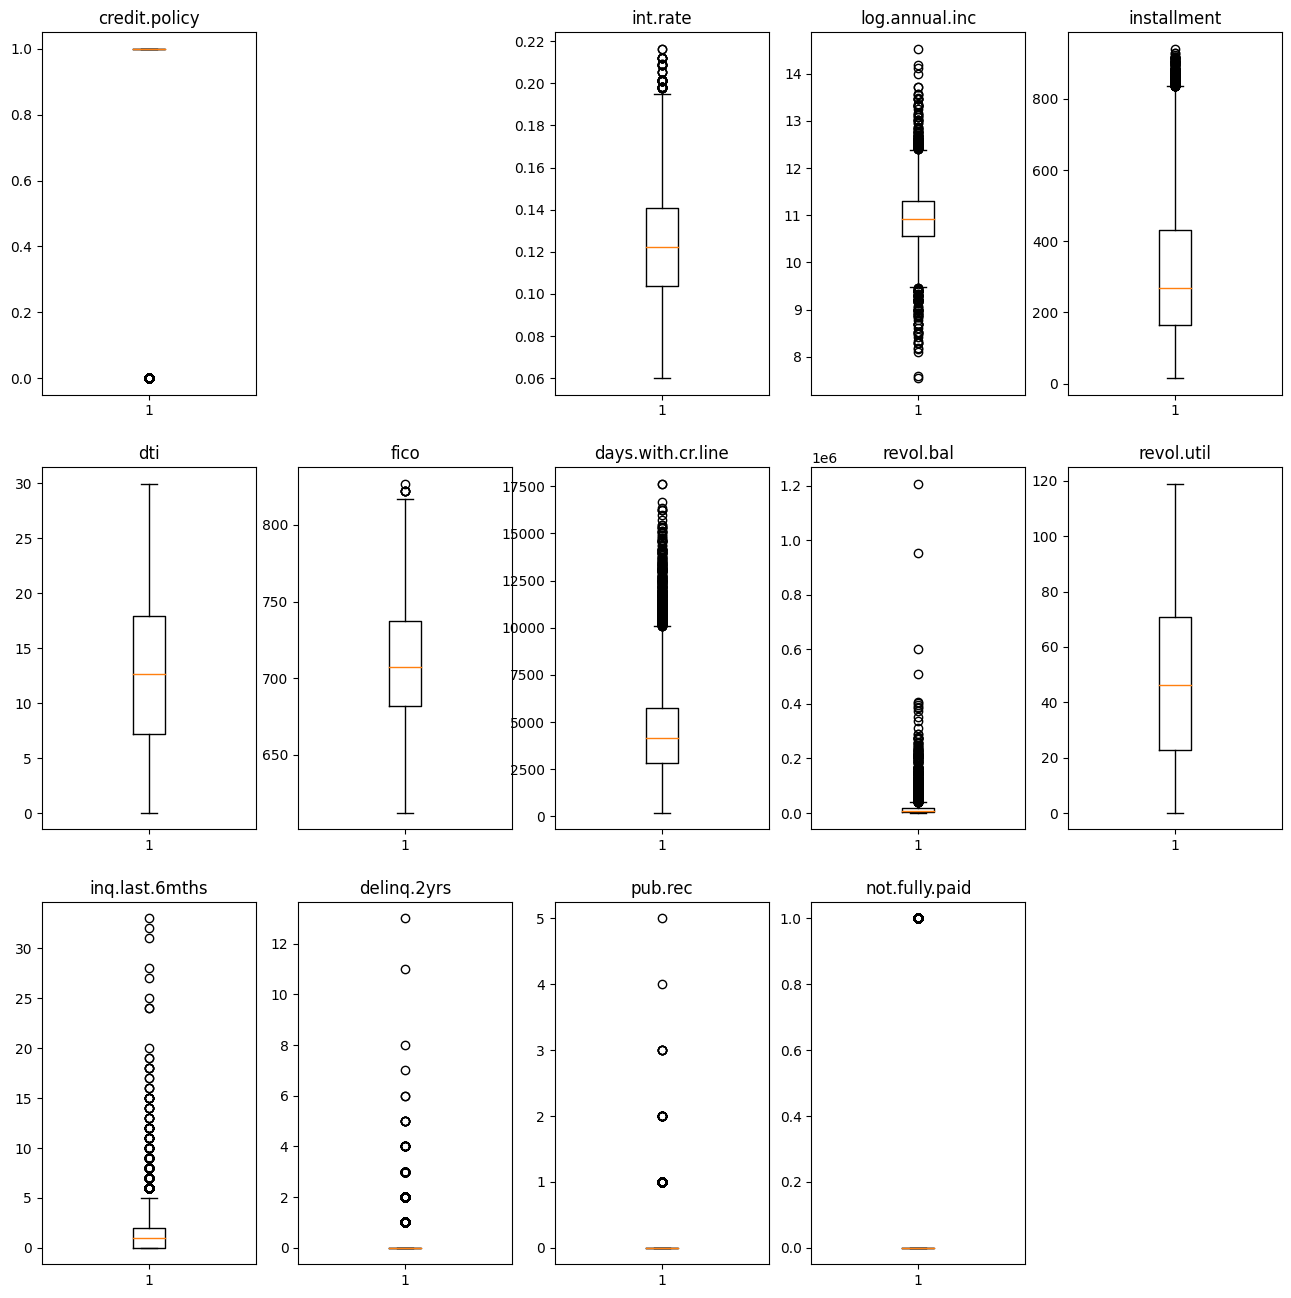

In [44]:
# 문자열 데이터를 제외한 모든 데이터 boxplot을 이용해서 이상치 여부 확인 

plt.figure(figsize=(16,16))

plt.subplot(3,5,1)
plt.boxplot(df["credit.policy"])
plt.title("credit.policy")

# plt.subplot(3,5,2)
# plt.boxplot(df["purpose"])
# plt.title("purpose")

plt.subplot(3,5,3)
plt.boxplot(df["int.rate"])
plt.title("int.rate")

plt.subplot(3,5,5)
plt.boxplot(df["installment"])
plt.title("installment")

plt.subplot(3,5,4)
plt.boxplot(df["log.annual.inc"])
plt.title("log.annual.inc")

plt.subplot(3,5,6)
plt.boxplot(df["dti"])
plt.title("dti")

plt.subplot(3,5,7)
plt.boxplot(df["fico"])
plt.title("fico")

plt.subplot(3,5,8)
plt.boxplot(df["days.with.cr.line"])
plt.title("days.with.cr.line")

plt.subplot(3,5,9)
plt.boxplot(df["revol.bal"])
plt.title("revol.bal")

plt.subplot(3,5,10)
plt.boxplot(df["revol.util"])
plt.title("revol.util")

plt.subplot(3,5,11)
plt.boxplot(df["inq.last.6mths"])
plt.title("inq.last.6mths")

plt.subplot(3,5,12)
plt.boxplot(df["delinq.2yrs"])
plt.title("delinq.2yrs")

plt.subplot(3,5,13)
plt.boxplot(df["pub.rec"])
plt.title("pub.rec")

plt.subplot(3,5,14)
plt.boxplot(df["not.fully.paid"])
plt.title("not.fully.paid")


plt.show()

In [ ]:
# # iqr 방식을 이용한 이상치 측정 
# # 범주형 데이터인 credit.policy, not.fully.paid 컬럼과 문자형인 purpose컬럼은 제외하고 이상치 확인 

# q3 = df.quantile(0.75)
# q1 = df.quantile(0.25)
# iqr = q3 - q1

# df_1 = pd.DataFrame()

# def is_kor_outlier(df):
#     kor_score = df['int.rate']
#     if kor_score > q3['int.rate'] + 1.5 * iqr['int.rate'] or kor_score < q1['int.rate'] - 1.5 * iqr['int.rate']:
#         return True
#     else:
#         return False
# df_1['int.rate_ipr'] = df.apply(is_kor_outlier, axis = 1) 


# def is_kor_outlier(df):
#     kor_score = df['installment']
#     if kor_score > q3['installment'] + 1.5 * iqr['installment'] or kor_score < q1['installment'] - 1.5 * iqr['installment']:
#         return True
#     else:
#         return False
# df_1['installment_ipr'] = df.apply(is_kor_outlier, axis = 1) 

# def is_kor_outlier(df):
#     kor_score = df['log.annual.inc']
#     if kor_score > q3['log.annual.inc'] + 1.5 * iqr['log.annual.inc'] or kor_score < q1['log.annual.inc'] - 1.5 * iqr['log.annual.inc']:
#         return True
#     else:
#         return False
# df_1['log.annual.inc_ipr'] = df.apply(is_kor_outlier, axis = 1) 

# def is_kor_outlier(df):
#     kor_score = df['dti']
#     if kor_score > q3['dti'] + 1.5 * iqr['dti'] or kor_score < q1['dti'] - 1.5 * iqr['dti']:
#         return True
#     else:
#         return False
# df_1['dti_ipr'] = df.apply(is_kor_outlier, axis = 1) 

# def is_kor_outlier(df):
#     kor_score = df['fico']
#     if kor_score > q3['fico'] + 1.5 * iqr['fico'] or kor_score < q1['fico'] - 1.5 * iqr['fico']:
#         return True
#     else:
#         return False
# df_1['fico_ipr'] = df.apply(is_kor_outlier, axis = 1) 

# def is_kor_outlier(df):
#     kor_score = df['days.with.cr.line']
#     if kor_score > q3['days.with.cr.line'] + 1.5 * iqr['days.with.cr.line'] or kor_score < q1['days.with.cr.line'] - 1.5 * iqr['days.with.cr.line']:
#         return True
#     else:
#         return False
# df_1['days.with.cr.line_ipr'] = df.apply(is_kor_outlier, axis = 1) 

# def is_kor_outlier(df):
#     kor_score = df['revol.bal']
#     if kor_score > q3['revol.bal'] + 1.5 * iqr['revol.bal'] or kor_score < q1['revol.bal'] - 1.5 * iqr['revol.bal']:
#         return True
#     else:
#         return False
# df_1['revol.bal_ipr'] = df.apply(is_kor_outlier, axis = 1) 

# def is_kor_outlier(df):
#     kor_score = df['revol.util']
#     if kor_score > q3['revol.util'] + 1.5 * iqr['revol.util'] or kor_score < q1['revol.util'] - 1.5 * iqr['revol.util']:
#         return True
#     else:
#         return False
# df_1['revol.util_ipr'] = df.apply(is_kor_outlier, axis = 1) 

# def is_kor_outlier(df):
#     kor_score = df['inq.last.6mths']
#     if kor_score > q3['inq.last.6mths'] + 1.5 * iqr['inq.last.6mths'] or kor_score < q1['inq.last.6mths'] - 1.5 * iqr['inq.last.6mths']:
#         return True
#     else:
#         return False
# df_1['inq.last.6mths_ipr'] = df.apply(is_kor_outlier, axis = 1) 

# def is_kor_outlier(df):
#     kor_score = df['delinq.2yrs']
#     if kor_score > q3['delinq.2yrs'] + 1.5 * iqr['delinq.2yrs'] or kor_score < q1['delinq.2yrs'] - 1.5 * iqr['delinq.2yrs']:
#         return True
#     else:
#         return False
# df_1['delinq.2yrs_ipr'] = df.apply(is_kor_outlier, axis = 1) 

# def is_kor_outlier(df):
#     kor_score = df['pub.rec']
#     if kor_score > q3['pub.rec'] + 1.5 * iqr['pub.rec'] or kor_score < q1['pub.rec'] - 1.5 * iqr['pub.rec']:
#         return True
#     else:
#         return False
# df_1['pub.rec_ipr'] = df.apply(is_kor_outlier, axis = 1) 


# print(df_1["int.rate_ipr"].value_counts())
# print(df_1["installment_ipr"].value_counts())
# print(df_1["log.annual.inc_ipr"].value_counts())
# print(df_1["dti_ipr"].value_counts())
# print(df_1["fico_ipr"].value_counts())
# print(df_1["days.with.cr.line_ipr"].value_counts())
# print(df_1["revol.bal_ipr"].value_counts())
# print(df_1["revol.util_ipr"].value_counts())
# print(df_1["inq.last.6mths_ipr"].value_counts())
# print(df_1["delinq.2yrs_ipr"].value_counts())
# print(df_1["pub.rec_ipr"].value_counts())

# # 이상치를 제거한 데이터 프레임 생성 

# df_ipr = df.copy()


# df_ipr = df_ipr[(df_ipr['int.rate'] <= q3['int.rate']+1.5*iqr['int.rate']) & (df['int.rate'] >= q1['int.rate']-1.5*iqr['int.rate'])]
# df_ipr = df_ipr[(df_ipr['installment'] <= q3['installment']+1.5*iqr['installment']) & (df['installment'] >= q1['installment']-1.5*iqr['installment'])]
# df_ipr = df_ipr[(df_ipr['log.annual.inc'] <= q3['log.annual.inc']+1.5*iqr['log.annual.inc']) & (df['log.annual.inc'] >= q1['log.annual.inc']-1.5*iqr['log.annual.inc'])]
# df_ipr = df_ipr[(df_ipr['dti'] <= q3['dti']+1.5*iqr['dti']) & (df['dti'] >= q1['dti']-1.5*iqr['dti'])]
# df_ipr = df_ipr[(df_ipr['fico'] <= q3['fico']+1.5*iqr['fico']) & (df['fico'] >= q1['fico']-1.5*iqr['fico'])]
# df_ipr = df_ipr[(df_ipr['days.with.cr.line'] <= q3['days.with.cr.line']+1.5*iqr['days.with.cr.line']) & (df['days.with.cr.line'] >= q1['days.with.cr.line']-1.5*iqr['days.with.cr.line'])]
# df_ipr = df_ipr[(df_ipr['revol.bal'] <= q3['revol.bal']+1.5*iqr['revol.bal']) & (df['revol.bal'] >= q1['revol.bal']-1.5*iqr['revol.bal'])]
# df_ipr = df_ipr[(df_ipr['revol.util'] <= q3['revol.util']+1.5*iqr['revol.util']) & (df['revol.util'] >= q1['revol.util']-1.5*iqr['revol.util'])]
# df_ipr = df_ipr[(df_ipr['inq.last.6mths'] <= q3['inq.last.6mths']+1.5*iqr['inq.last.6mths']) & (df['inq.last.6mths'] >= q1['inq.last.6mths']-1.5*iqr['inq.last.6mths'])]
# df_ipr = df_ipr[(df_ipr['delinq.2yrs'] <= q3['delinq.2yrs']+1.5*iqr['delinq.2yrs']) & (df['delinq.2yrs'] >= q1['delinq.2yrs']-1.5*iqr['delinq.2yrs'])]
# df_ipr = df_ipr[(df_ipr['pub.rec'] <= q3['pub.rec']+1.5*iqr['pub.rec']) & (df['pub.rec'] >= q1['pub.rec']-1.5*iqr['pub.rec'])]

# #  이상치 제거한 데이터프레임 확인
# df_ipr.info()

# # fico 컬럼을 이용한 새로운 컬럼 생성 

# ls = df_ipr['fico']
# y_ipr = []

# for i in ls.index:
#     if ls[i] > 740 :
#         y_ipr.append("good")
#     elif ls[i] > 670:
#         y_ipr.append("std")
#     else:
#         y_ipr.append("poor")
# y_ipr = pd.DataFrame(y_ipr)
# y_ipr.columns = ['grade']
# df_ipr =  pd.concat([df_ipr, y_ipr], axis=1)
# df_ipr=df_ipr.dropna(axis=0)
# df_ipr

# # map 함수를 이용해서 grade 컬럼을 카테고리화 함 

# m = {
#     "poor":0,
#     "std":1,
#     "good":2,
    
# }

# df_ipr['grade'] = df_ipr['grade'].map(m)

# df_ipr.drop("fico", axis=1, inplace=True)

# df_ipr.to_csv("./df_ipr.csv")


In [70]:
# fico 컬럼을 이용한 새로운 컬럼 생성 
ls = df['fico']
y = []

for i in ls.index:
    if ls[i] > 740 :
        y.append("good")
    elif ls[i] > 670:
        y.append("std")
    else:
        y.append("poor")
y = pd.DataFrame(y)
y.columns = ['grade']

df = pd.concat([df,y], axis=1)
df.head(3)


,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,grade
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,std
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,std
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,std


In [84]:
# map 함수를 이용해서 grade 컬럼을 카테고리화 함 

m = {
    "poor":0,
    "std":1,
    "good":2,
    
}

df['grade'] = df['grade'].map(m)

In [86]:
# fico 컬럼을 이용해서 생성한 grade 컬럼을 활용하기 위해 다중공선성 문제가 야기될 fico컬럼 삭제
df.drop("fico", axis=1 , inplace= True)


In [105]:
# one_encoder = OneHotEncoder()
# purpose_one = one_encoder.fit_transform(df)
# df[]

df = pd.get_dummies(df,drop_first=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               9578 non-null   int64  
 1   int.rate                    9578 non-null   float64
 2   installment                 9578 non-null   float64
 3   log.annual.inc              9578 non-null   float64
 4   dti                         9578 non-null   float64
 5   days.with.cr.line           9578 non-null   float64
 6   revol.bal                   9578 non-null   int64  
 7   revol.util                  9578 non-null   float64
 8   inq.last.6mths              9578 non-null   int64  
 9   delinq.2yrs                 9578 non-null   int64  
 10  pub.rec                     9578 non-null   int64  
 11  not.fully.paid              9578 non-null   int64  
 12  grade                       9578 non-null   int64  
 13  purpose_credit_card         9578 

In [107]:
df.to_csv("./df.csv")